# PART-A

The municipal corporation of a city needs extra money for its development plans for the city. The mayor of the city proposes a new 1% tax on businesses that is proportional to the amount spent to lease property in the city. Find out the revenue that 1% tax will generate 4500 businesses in the city lease the property. The data for the annual cost of the lease for a sample of 233 recent lease is attached. 

In [1]:
#importing liberaries
from random import sample
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import statsmodels.stats.api as sms

# 1. Load the Data

In [3]:
# Loading the Data
df = pd.read_csv('property_tax.csv')
df

,Total Lease Cost
0,329959
1,298073
2,2820213
3,883773
4,359745
...,...
218,979391
219,1217664
220,383177
221,860709


# 2. Describe the Data

In [4]:
print(f" Minimum Total Lease Cost = {df['Total Lease Cost'].min()}\n Maximum Total Lease Cost = {df['Total Lease Cost'].max()}")

 Minimum Total Lease Cost = 20409
 Maximum Total Lease Cost = 2820213


In [5]:
# getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total Lease Cost  223 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [6]:
# length of dataset
n = len(df)
mean = df['Total Lease Cost'].mean() # Mean
sdev = df['Total Lease Cost'].std() # Standard Deviation
se = sdev/np.sqrt(n) # Standard Error
skew = df['Total Lease Cost'].skew()
K4 = df['Total Lease Cost'].kurtosis()
print(f" Length of Data = {n}\n Mean = {mean}\n Standard Deviation = {sdev}\n Standard Error = {se}\n Skewness = {skew}\n Kurtosis = {K4}")

 Length of Data = 223
 Mean = 478603.4798206278
 Standard Deviation = 535342.5637301835
 Standard Error = 35849.18962885723
 Skewness = 1.953472329294872
 Kurtosis = 4.137508828414167


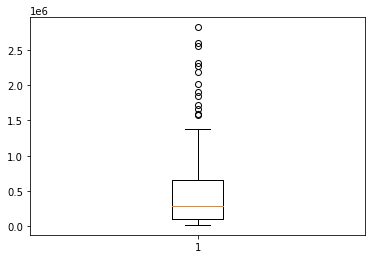

In [7]:
# Creating a Box-plot
plt.boxplot(df["Total Lease Cost"])
plt.show()

<AxesSubplot:xlabel='Total Lease Cost', ylabel='Density'>

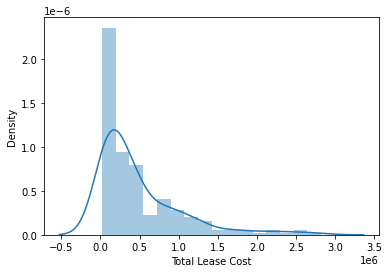

In [8]:
sns.distplot(df["Total Lease Cost"])

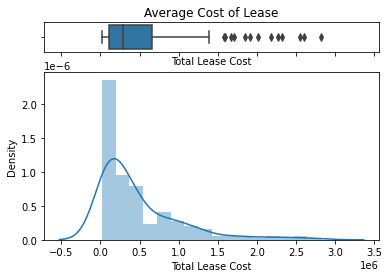

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Total Lease Cost"],ax=ax_box).set(title='Average Cost of Lease')
sns.distplot(df["Total Lease Cost"],ax=ax_hist)
plt.show()


# 3. Check the Simple Random Condition and sample size condition

***Simple Random Condition!!!***

population_size = 4500

sample_size = 223

So Sample Size <= 10% of Population Size therefore it follows the condition.

In [10]:
# Simple Size Condition

print("Kurtosis Value : ",10*np.square(stats.kurtosis(df["Total Lease Cost"])))
print("Skew Value : ",10*np.absolute(stats.skew(df["Total Lease Cost"])))
print("Here n is 223 so n > kurtosis value & n > skew value, Therefore it sattisfy Simple size condition!!!")

Kurtosis Value :  161.4861882003397
Skew Value :  19.40307752072259
Here n is 223 so n > kurtosis value & n > skew value, Therefore it sattisfy Simple size condition!!!


# 4. Calculate ta/2,n-1

In [12]:
t = stats.t.ppf(1.95/2,n-1)
t

1.9707073953190277

# 5. Calculate 95% CI

In [13]:
cl95 = sms.DescrStatsW(df).tconfint_mean()
print(f" The 95% CL is  {cl95}")

 The 95% CL is  (array([407955.21670284]), array([549251.74293841]))


# 6. Calculate the tax that will be collected

In [14]:
print(f" 1% Tax for each buisness is between {(mean - se*t)*0.01} and {(mean + se*t)*0.01}")
print(f" 1% Tax for 4500 buisnesses is between {(mean - se*t)*0.01*4500} and {(mean + se*t)*0.01*4500}")

 1% Tax for each buisness is between 4079.5521670284465 and 5492.51742938411
 1% Tax for 4500 buisnesses is between 18357984.751628008 and 24716328.432228494


# 7. Summarize the results

 At first we imported important liberaries
 
 Then we loaded the data
 
 Then we have described the data and checked Simple random condition and sample size condition
 
 After it we calculated 95% Cofidence Interval
 
 We are confident that the average cost of the lease is between [407955.21670284] and [549251.74293841]

 On Average we are 95% Confident that the tax will be between [4079.5521670284465] and [5492.51742938411] per buisness
 
 We are 95% Cinfident that the Total tax will be between [18357984.751628008] and [24716328.432228494]

# PART-B

The municipal corporation was able to collect a good amount of revenue which was properly utilized for the welfare scheme. The mayor of the city was happy and decided to run for reelection. A local newspaper conducted a pre-poll survey and collected the data from a sample of 400 registered voters. Only 40% of the registered voters who participated in the survey wanted to see him as the mayor again. What do the numbers indicate about the mood of the voters in the city, Assume that to win the election a candidate requires more than 50% of the casted votes? 

In [16]:
#importing liberaries
import numpy as np 
from scipy.stats import norm

# 1. What is the parameter of interest?

The paraameter of the interest would be proportion in the population of the registered voters who think that the mayor is doing a good job. We assume that the data reported in the news is a random sample from this population. In this case, 95% z-interval to p is used to summarize what we can conclude about p from the sample.

# 2. Check the SRS and Sample Size Condition

""" SRS CONDITION """

We assume that the pollsters used the simple random sample. The n is much lesser than the 10% of the population

--------------------------------------------------------------------------------------------------------------------------------------

""" Simple Size Condition """

Both np and n(1-p) are larger than 10

# 3. Estimate standard error

In [5]:
# Calculating Standard Error
SError = (0.4 * 0.6)/400 
SError = np.sqrt(a)
print(f" Estimated Standard Error = {SError}")

 Estimated Standard Error = 0.02449489742783178


# 4. Calculate 95% z-interval for the parameter

In [23]:
lower_value, high_value = proportion.proportion_confint(160,400,alpha=0.05)
lower_value, high_value

(0.3519908832364469, 0.44800911676355315)

# 5. Summarize the results

At first we imported important liberaries.

After it we found out the area of interest which is basically the proportion of population.

Then we have checked the Simple Random Sample Condition and Sample Size Condition which basically meet the requirements.

Then we estimated the Standard Error which comes out to be, Estimated Standard Error = 0.02449489742783178

The 95% Confident Interval comes out to be, CI 95% = (0.3519908832364469, 0.44800911676355315)


So, We can tell the mayor that he can be 95% confident that between 35% and 45% of the registered voters think that he is doing a good job. Fewer than half are happy with him. So to win elections, he need to convince more voters